# ***ASSIGNMENT - 8***

## Importing Libraries

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit joblib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

import joblib

## Data Exploration (EDA)

In [ ]:
# Load dataset
data = pd.read_csv("diabetes.csv")

# Display first rows
print("\nFirst 5 rows of dataset:")
print(data.head())

# Dataset info
print("\nDataset Information:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())


First 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nu

## Visualizations

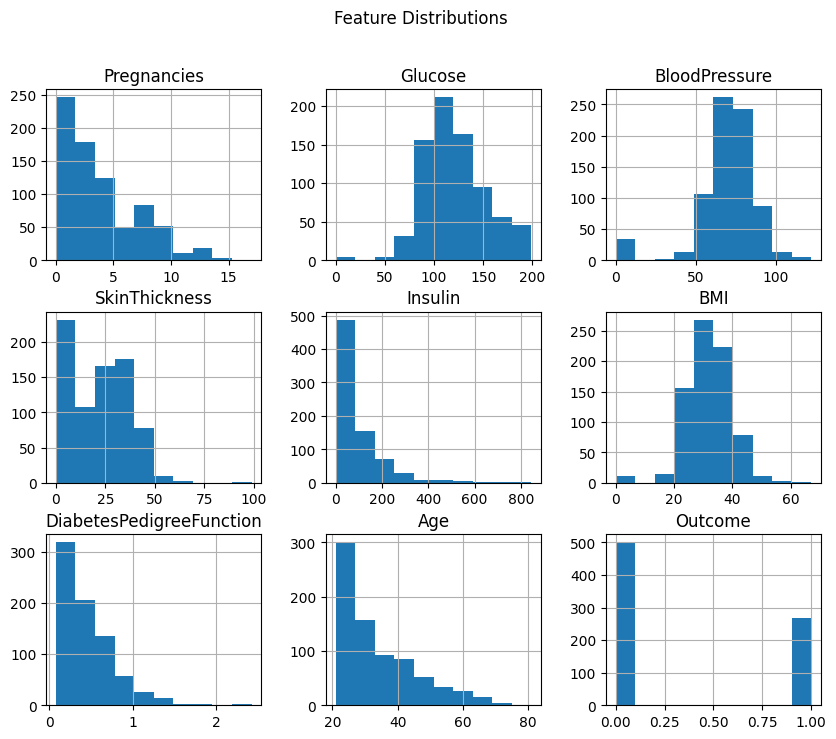

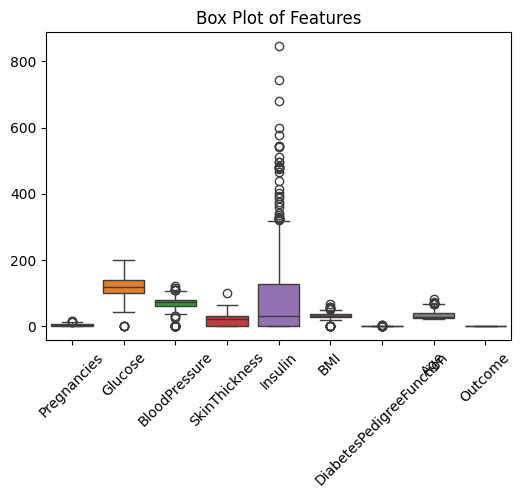

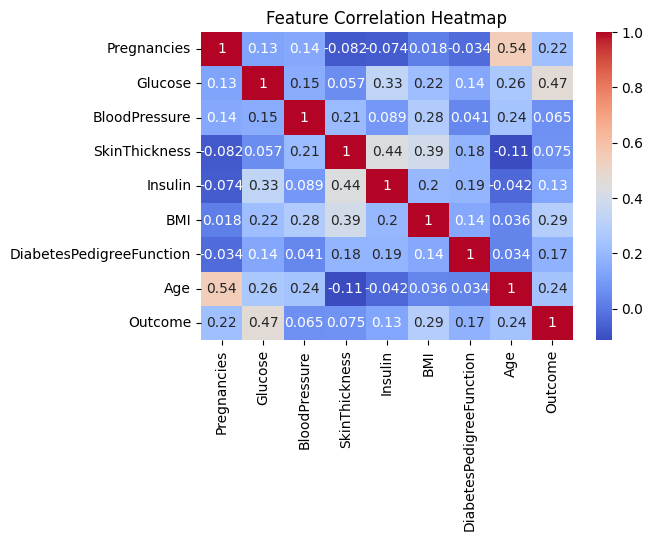

In [ ]:
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Preprocessing

In [ ]:
# Replace zero values with NaN for selected columns
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zero] = data[columns_with_zero].replace(0, np.nan)

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model and scaler
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Model Evaluation


Model Performance:
Accuracy : 0.7078
Precision: 0.6000
Recall   : 0.5000
F1 Score : 0.5455
ROC AUC  : 0.8130

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



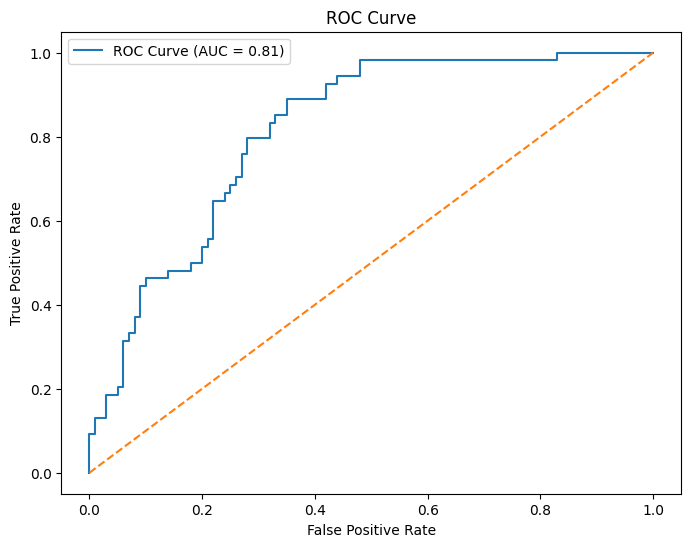

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Interpretation of Coefficients

In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nLogistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
                    Feature  Coefficient
1                   Glucose     1.182511
5                       BMI     0.688735
0               Pregnancies     0.377502
6  DiabetesPedigreeFunction     0.233386
7                       Age     0.147798
3             SkinThickness     0.028225
2             BloodPressure    -0.044066
4                   Insulin    -0.066157


## Deployment with Streamlit

In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("logistic_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Diabetes Prediction App")
st.write("Logistic Regression Model")

# User inputs
pregnancies = st.number_input("Pregnancies", 0, 20)
glucose = st.number_input("Glucose Level", 0, 200)
blood_pressure = st.number_input("Blood Pressure", 0, 150)
skin_thickness = st.number_input("Skin Thickness", 0, 100)
insulin = st.number_input("Insulin", 0, 900)
bmi = st.number_input("BMI", 0.0, 70.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0)
age = st.number_input("Age", 0, 120)

# Prediction
if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure,
                             skin_thickness, insulin, bmi, dpf, age]])

    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)[0][1]

    if prediction[0] == 1:
        st.error(f"High Risk of Diabetes (Probability: {probability:.2f})")
    else:
        st.success(f"Low Risk of Diabetes (Probability: {probability:.2f})")


2026-01-17 05:24:00.983 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.500 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-17 05:24:01.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 05:24:01.519 Thread 'MainThread': mi

## Interview Questions

### 1. Difference between Precision and Recall

Precision measures a model's accuracy in positive predictions, while Recall measures its ability to find all relevant cases.

### 2. Cross-validation and its importance in binary classification

Cross-validation is a resampling technique that splits data into multiple training/validation sets to robustly assess a model's performance and generalization ability, preventing overfitting by ensuring every data point serves as a test case at some point.

It is important in binary classification for Better generalization, Reduce overfitting, Reliable performance estimation.